# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

We will also be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

In [90]:
!pip install -U scikit-learn

In [91]:
!pip install pandas

In [92]:
!pip install seaborn

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

#### (a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# plt.style.available

     SpeakerID Gender Phoneme        F1        F2        F3        F4  \
0         elc0      F      h#  0.905573  1.738244  2.668338  3.705146   
1         elc0      F       q  0.662589  2.294984  3.031420  4.249530   
2         elc0      F      ih  0.546685  2.327745  2.940156  4.430072   
3         elc0      F       n  0.433152  1.945851  2.655110  4.270400   
4         elc0      F       w  0.490665  0.797423  2.809036  4.628589   
...        ...    ...     ...       ...       ...       ...       ...   
7136      pam0      M       z  0.310477  1.553493  2.419699  4.001645   
7137      pam0      M     dcl  0.303197  1.614552  2.418308  4.000498   
7138      pam0      M       d  0.327711  1.588264  2.398628  4.148673   
7139      pam0      M      ey  0.498319  1.664263  2.298876  4.355669   
7140      pam0      M       z  0.404878  1.622776  2.312402  4.273212   

            B1        B2        B3        B4  
0     0.249606  0.334268  0.371210  0.451931  
1     0.230553  0.415485  0.2

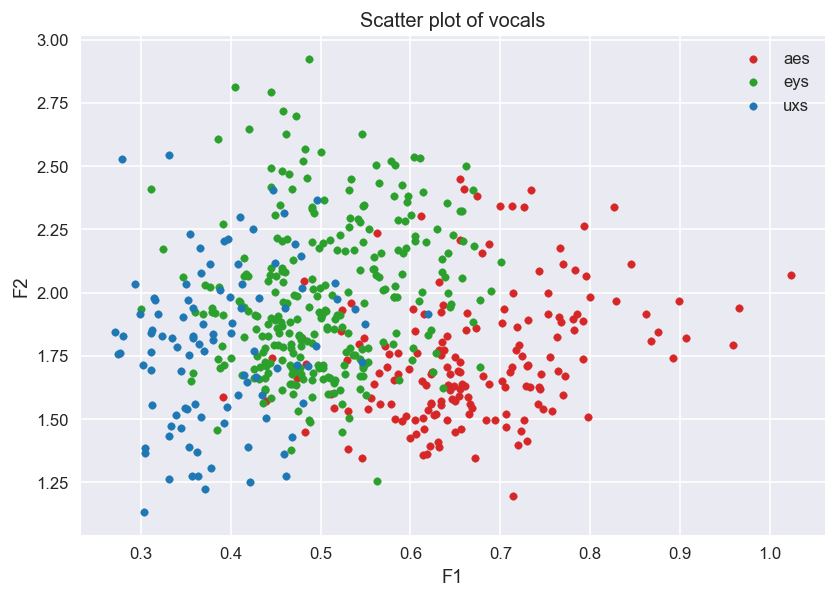

In [124]:

# %matplotlib notebook
# %matplotlib inline

plt.style.use('seaborn')

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

# Plotting here

print(test)
plt.rcParams["figure.dpi"] = 120

# ax = df.plot.scatter(x="x",y="a", color="b", label="Scatter plot of vocal")

ax = aes.plot.scatter(
    x="F1", y='F2', title='Scatter plot of vocals', label="aes", c='tab:red')
eys.plot.scatter(x="F1", y='F2', ax=ax, label='eys', c='tab:green')
uxs.plot.scatter(x="F1", y='F2', ax=ax, label='uxs', c='tab:blue')

plt.show()


The less correlated the data appears the harder it is to predict?

#### (b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

In [95]:
# training_data = pd.DataFrame(data={'aes': aes[['F1', 'F2']], 'eys': eys[['F1', 'F2']], 'uxs': uxs[['F1', 'F2']]})

# # multi = aes.set_index(['aes', 'eys', 'eys'])

# print(multi)

# training_data = [aes[['F1', 'F2']], eys[['F1', 'F2']], uxs[['F1', 'F2']]]
training_data = {'aes': aes[['F1', 'F2']], 'eys': eys[['F1', 'F2']], 'uxs': uxs[['F1', 'F2']]}
# training_data = {'aes': aes[['F1', 'F2']].to_dict(), 'eys': eys[['F1', 'F2']].to_dict(), 'uxs': uxs[['F1', 'F2']].to_dict()}
# training_data = pd.concat([aes[['F1', 'F2']], eys[['F1', 'F2']], uxs[['F1', 'F2']]], keys=['aes', 'eys', 'uxs'], levels=[['aes', 'eys', 'uxs']], names=['vowl', 'index'], join='outer', ignore_index=True, axis=1)
# training_data = pd.concat([aes, eys, eys])

# training_data = pd.DataFrame(data=training_data)
print(training_data)

{'aes':              F1        F2
39     0.714021  1.999640
171    0.718775  1.862884
205    0.712715  2.342793
585    0.829052  1.967996
597    0.906937  1.818808
...         ...       ...
12182  0.617508  1.634245
12194  0.666529  1.559452
12285  0.654254  1.590966
12432  0.473568  1.662460
12476  0.522834  1.846401

[173 rows x 2 columns], 'eys':              F1        F2
107    0.571166  2.015187
138    0.590581  2.074329
152    0.581809  1.982820
182    0.605038  2.204604
214    0.483081  2.565800
...         ...       ...
12437  0.428297  1.854382
12457  0.501317  1.912255
12491  0.507001  1.856752
12551  0.547231  1.703629
12567  0.550797  1.594448

[283 rows x 2 columns], 'uxs':              F1        F2
83     0.479160  2.019393
88     0.460181  1.939525
319    0.474038  1.713061
516    0.458882  2.315319
569    0.486259  1.711566
...         ...       ...
11634  0.312729  1.554931
11742  0.418376  1.645457
11927  0.399661  1.841294
12347  0.434512  1.593966
12427  0.360071  1

In [96]:
aes_test = test[test["Phoneme"] == 'ae']
eys_test = test[test["Phoneme"] == 'ey']
uxs_test = test[test["Phoneme"] == 'ux']

observations = {'aes': aes_test[['F1', 'F2']], 'eys': eys_test[['F1', 'F2']], 'uxs': uxs_test[['F1', 'F2']]}

In [97]:
def prep_model_from_df(dataset_of_df):
    # x = pd.DataFrame(data={'F1:': df["F1"], 'F2': df["F2"]})
    # x = df[["F1", "F2"]]
    # x = np.array([df["F1"], df["F2"]])

    # print(x)
    data_size  = 0 

    for key in dataset_of_df:
        data_size += dataset_of_df.get(key).shape[0]
    
    print(data_size)

    model = {}
    for key in dataset_of_df:
        data = dataset_of_df.get(key)
        model[key] = {'mean': data.mean(0), 'cov': data.cov(), 'prior': data.shape[0]/data_size}

    return model

models = prep_model_from_df(training_data)
print("model:", models.get('aes'))


556
model: {'mean': F1    0.66986
F2    1.74238
dtype: float64, 'cov':           F1        F2
F1  0.010608  0.007590
F2  0.007590  0.063172, 'prior': 0.31115107913669066}


In [121]:
import scipy.stats as stats

def MLE_classifier(observation_classes, models):
    pred_cols = ['truth', 'prediciton']
    predicitons = pd.DataFrame(columns=pred_cols)
    
    data_size  = 0

    for key in observation_classes:
        data_size += observation_classes.get(key).shape[0]

    error_rate = 0

    # iterate over sets of observations with given classes as reference
    for observ_key in observation_classes:
        observation_class = observation_classes.get(observ_key)
        
        # iterate over unique observations 
        for index, observation in observation_class.iterrows():
            # print(observation)
            prediciton = {}

            # iterate over and predict with given models
            for model_key in models:
                model = models.get(model_key)
                rvs = stats.multivariate_normal(mean=model.get('mean'), cov=model['cov'])
                # print("observation: ", observation)
                pred = rvs.pdf(observation) * model.get('prior')
                prediciton[model_key] = pred
                # print(pred)
            # print(prediciton)
            mle_prediction = max(zip(prediciton.values(), prediciton.keys()))[1]
            # print(mle_prediction)

            df = pd.DataFrame([[observ_key, mle_prediction]], columns=pred_cols, index=[index])
            # print(df)
            # predicitons[index] = {'truth': mle_prediction, 'prediction': mle_prediction}
            predicitons = predicitons.append(df)

            if(mle_prediction != observ_key):
                error_rate+=1

        # print("observation:", observation_class)
    
    error_rate = error_rate / data_size
    print('error_rate: ', error_rate)

    # return pd.DataFrame(predicitons)
    return predicitons

MLE_classifier(observations, models)


error_rate:  0.26199261992619927


,truth,prediciton
115,aes,eys
286,aes,eys
296,aes,aes
378,aes,aes
530,aes,eys
...,...,...
6523,uxs,eys
6746,uxs,uxs
6799,uxs,uxs
6899,uxs,uxs


#### testing 

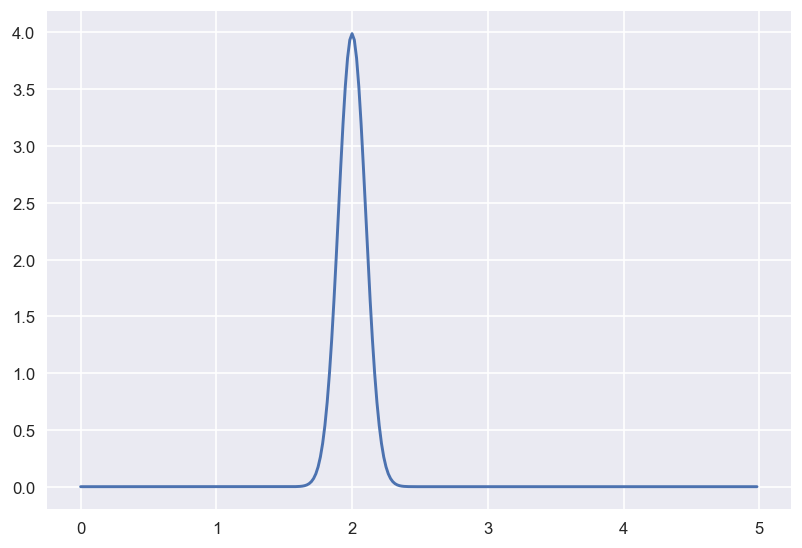

In [99]:
x = np.linspace(0, 5, 300, endpoint=False)
y = stats.multivariate_normal.pdf(x, mean=2, cov=0.01)

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

In [100]:
x, y = np.mgrid[-1:1:.005, -1:1:.005]
pos = np.dstack((x, y))
rv = stat.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

NameError: name 'stat' is not defined

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
        columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
        columns=['one', 'two'])


res = pd.concat([df1, df2], axis=1,
                keys=['level1','level2'], 
                levels=[['level1', 'level2','level3']])
print(res.keys)
print(res['level1'])

# for e in res:
#         print(e)
        # print(res[e[0]])

<bound method NDFrame.keys of   level1     level2     
     one two    one  two
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0>
   one  two
a    0    1
b    2    3
c    4    5


In [ ]:
dic = {"class1": {"mean": 1, "var": 2}, "class2": {"mean": 1, "var": 2}}

print(dic)

test = pd.DataFrame(data=dic)
print(test)

{'class1': {'mean': 1, 'var': 2}, 'class2': {'mean': 1, 'var': 2}}
      class1  class2
mean       1       1
var        2       2


#### (c) To visualize the classes models and the classifier created in (b), plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$, by using the following function.

In [ ]:
def plotGaussian(mean, cov, color, ax):
    """ 
        Creates a contour plot for a bi-variate normal distribution

        mean: numpy array 2x1 with mean vector
        cov: numpy array 2x2 with covarince matrix
        color: name of color for the plot (see https://matplotlib.org/stable/gallery/color/named_colors.html)
        ax: axis handle where the plot is drawn (can for example be returned by plt.gca() or plt.subplots())
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(
        xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    mvn = stats.multivariate_normal(mean, cov)
    lik = mvn.pdf(xy)
    ax.contour(x, y, lik, colors=color)


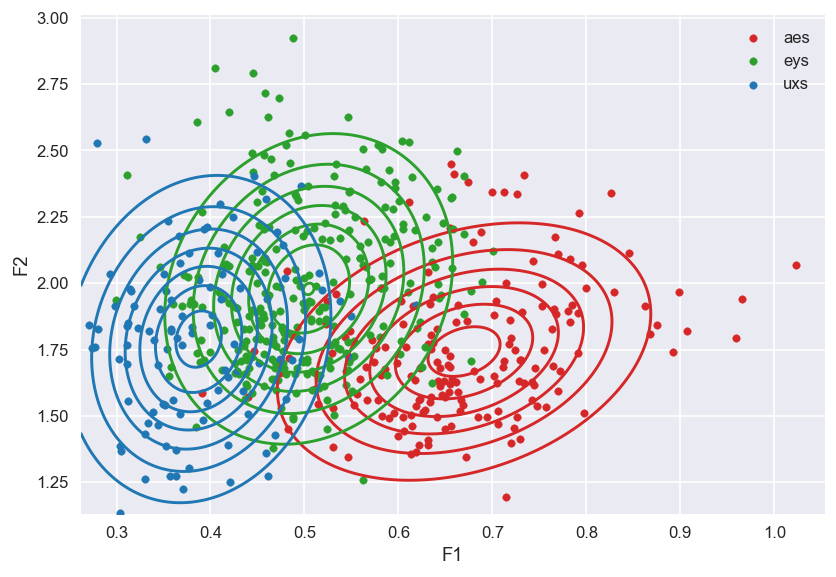

In [ ]:

colors = {'aes': 'tab:red','eys': 'tab:green', 'uxs': 'tab:blue'}


fig, ax = plt.subplots()

for key in models:
    model = models.get(key)
    data = training_data.get(key)
    # print(model.get('mean'))
    # print(model.get('cov'))
    # ScatterPlot(model.get('mean'), model.get('cov'), colors.get(key), ax)

    data.plot.scatter(x="F1", y='F2', ax=ax, label=key, c=colors.get(key))

    plotGaussian(model.get('mean'), model.get('cov'), colors.get(key), ax)
    
plt.show()

*Try:* Plot the decision regions for the Bayesian classifier. Tips: Calculate the posterior for each class, use the `numpy.argmax` function to get the decision regions, and `matplotlib.pyplot.contourf` to plot them.

#### (d) Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

error_rate:  0.26199261992619927


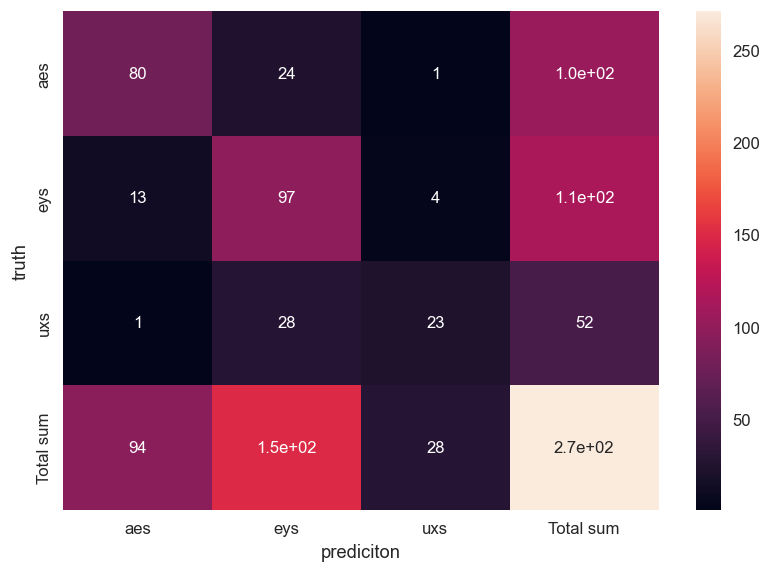

In [ ]:
predictions = MLE_classifier(observations, models)

# df = pd.DataFrame(data, columns=['truth','prediciton'])
confusion_matrix = pd.crosstab(predictions['truth'], predictions['prediciton'], rownames=['truth'], colnames=['prediciton'], margins = True, margins_name='Total sum')

sn.heatmap(confusion_matrix, annot=True)
plt.show()

#### (e) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (d). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

Training data

In [ ]:
# form training data
F1toF4 = ['F1', 'F2', 'F3', 'F4']
B1toB4 = ['B1', 'B2', 'B3', 'B4']

training_data_F1toF4 = {'aes': aes[F1toF4], 'eys': eys[F1toF4], 'uxs': uxs[F1toF4]}
# print( training_data_F1toF4)
training_data_F1toF4_B1toB4 = {'aes': aes[F1toF4+B1toB4], 'eys': eys[F1toF4+B1toB4], 'uxs': uxs[F1toF4+B1toB4]}
print(training_data_F1toF4_B1toB4)

['B1', 'B2', 'B3', 'B4']
{'aes':              F1        F2        F3        F4        B1        B2        B3  \
39     0.714021  1.999640  2.834684  4.251902  0.162071  0.312755  0.331868   
171    0.718775  1.862884  2.815234  4.277663  0.150145  0.268921  0.354525   
205    0.712715  2.342793  2.936107  4.309492  0.193928  0.338076  0.297524   
585    0.829052  1.967996  3.037148  4.479614  0.243885  0.283130  0.372099   
597    0.906937  1.818808  2.605929  4.513912  0.146956  0.308710  0.366330   
...         ...       ...       ...       ...       ...       ...       ...   
12182  0.617508  1.634245  2.448025  3.890272  0.191030  0.292165  0.279443   
12194  0.666529  1.559452  2.323424  3.510620  0.184958  0.309526  0.309486   
12285  0.654254  1.590966  2.374534  3.743037  0.186697  0.316133  0.265717   
12432  0.473568  1.662460  2.493703  3.753486  0.216027  0.310498  0.305218   
12476  0.522834  1.846401  2.517814  3.631916  0.214197  0.280197  0.340712   

             B4  


models 

In [119]:
models_F1toF4 = prep_model_from_df(training_data_F1toF4)
models_F1toF4_B1toB4 = prep_model_from_df(training_data_F1toF4_B1toB4)

print(models_F1toF4)

271
556
{'aes': {'mean': F1    0.678651
F2    1.778506
F3    2.612488
F4    3.863120
dtype: float64, 'cov':           F1        F2        F3        F4
F1  0.009253  0.001090  0.004130  0.010461
F2  0.001090  0.050625  0.041624  0.029565
F3  0.004130  0.041624  0.085511  0.033412
F4  0.010461  0.029565  0.033412  0.133464, 'prior': 0.3874538745387454}, 'eys': {'mean': F1    0.523203
F2    1.952396
F3    2.635335
F4    3.881319
dtype: float64, 'cov':           F1        F2        F3        F4
F1  0.006265  0.004069  0.008102  0.011658
F2  0.004069  0.049358  0.042683  0.047374
F3  0.008102  0.042683  0.071361  0.055778
F4  0.011658  0.047374  0.055778  0.137882, 'prior': 0.42066420664206644}, 'uxs': {'mean': F1    0.415206
F2    1.804169
F3    2.521837
F4    3.896713
dtype: float64, 'cov':           F1        F2        F3        F4
F1  0.006760  0.001723  0.008439  0.008228
F2  0.001723  0.081022  0.046403  0.048660
F3  0.008439  0.046403  0.110117  0.065853
F4  0.008228  0.048660  0.065

In [117]:
observations_F1toF4 = {'aes': aes_test[F1toF4], 'eys': eys_test[F1toF4], 'uxs': uxs_test[F1toF4]}
observations_F1toF4_B1toB4 = {'aes': aes_test[F1toF4+B1toB4], 'eys': eys_test[F1toF4+B1toB4], 'uxs': uxs_test[F1toF4+B1toB4]}
# observations_F1toF4 = observations_F1toF4_B1toB4
print(observations_F1toF4)
# print(observations_F1toF4_B1toB4)

{'aes':             F1        F2        F3        F4
115   0.626849  2.040568  2.737875  4.225691
286   0.635120  2.129651  3.035465  4.324663
296   0.765164  1.928721  2.329302  4.138947
378   0.657672  1.512031  2.473496  3.353928
530   0.639403  2.078772  2.610199  3.651029
...        ...       ...       ...       ...
6719  0.871840  1.468683  2.460316  3.376118
6860  0.652087  1.519256  2.211460  3.977117
6978  0.673218  1.611651  2.372237  3.898877
7108  0.708950  1.390807  2.111469  4.040951
7113  0.651769  1.622842  2.485576  4.106205

[105 rows x 4 columns], 'eys':             F1        F2        F3        F4
5     0.496880  2.281662  2.881794  4.402057
15    0.573029  2.188101  2.791980  4.269516
45    0.417041  2.033501  2.956206  4.607500
128   0.595308  1.990928  2.818105  4.255935
262   0.612936  2.220185  3.062940  4.092339
...        ...       ...       ...       ...
6830  0.447298  2.042744  2.683478  3.712582
6846  0.323772  2.147505  2.889995  3.814136
6974  0.533471 

error_rate:  0.23247232472324722


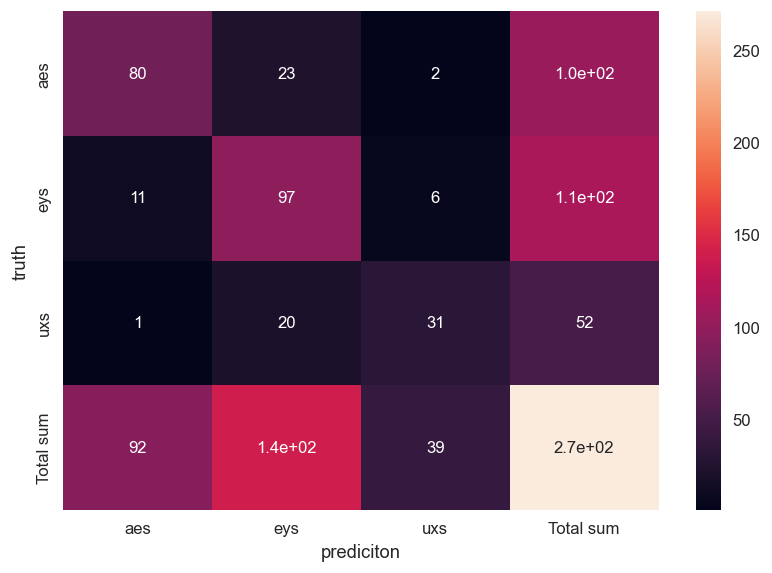

In [122]:
predictions_F1toF4 = MLE_classifier(observations_F1toF4, models_F1toF4)

confusion_matrix = pd.crosstab(predictions_F1toF4['truth'], predictions_F1toF4['prediciton'], rownames=['truth'], colnames=['prediciton'], margins = True, margins_name='Total sum')

sn.heatmap(confusion_matrix, annot=True)
plt.show()

error_rate:  0.2878228782287823


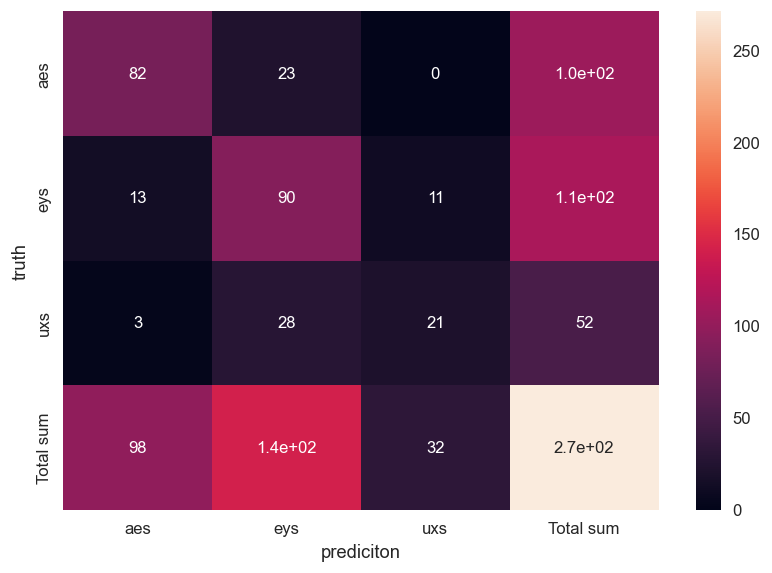

In [123]:
predictions_F1toF4_B1toB4 = MLE_classifier(observations_F1toF4_B1toB4, models_F1toF4_B1toB4)

confusion_matrix = pd.crosstab(predictions_F1toF4_B1toB4['truth'], predictions_F1toF4_B1toB4['prediciton'], rownames=['truth'], colnames=['prediciton'], margins = True, margins_name='Total sum')

sn.heatmap(confusion_matrix, annot=True)
plt.show()

#### (f) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (e).

In [221]:
g = train['Gender']

male = aes[aes["Gender"] == 'M']
female = aes[aes["Gender"] == 'F']

print(1 in [1,2,3])
# print(g)
# print(male)
# print(male)
# print(aes)
# print(male.index.tolist())
# print(female.index.tolist())
print(aes.loc[female.index.tolist(), :])
# print(aes.loc[male.index.tolist(), :])
# print(aes.iloc[lambda x: x.index in [39]])
# print(aes.iloc[39]['Gender'])

True
      SpeakerID Gender Phoneme        F1        F2        F3        F4  \
39         cjf0      F      ae  0.714021  1.999640  2.834684  4.251902   
171        dml0      F      ae  0.718775  1.862884  2.815234  4.277663   
205        dml0      F      ae  0.712715  2.342793  2.936107  4.309492   
585        mem0      F      ae  0.829052  1.967996  3.037148  4.479614   
597        mem0      F      ae  0.906937  1.818808  2.605929  4.513912   
664        sah0      F      ae  0.673933  2.380839  3.158002  4.460169   
675        sah0      F      ae  0.726161  2.337655  3.212922  4.254976   
682        sah0      F      ae  0.867463  1.809466  2.807877  4.095449   
815        sjk1      F      ae  0.780882  1.895697  2.781179  3.841786   
950        tbr0      F      ae  0.795401  2.066724  2.910593  4.249029   
999        vfb0      F      ae  0.753116  1.997699  2.635933  4.261940   
1018       vfb0      F      ae  0.959005  1.794564  3.195128  4.615610   
1033       vfb0      F      ae  0

In [249]:
# print(aes)


training_data = {"aes": aes, "eys": eys, "uxs": uxs}

training_data_by_gender = {}
for key, train in training_data.items():
    # print(train)
    male = train[train["Gender"] == 'M']
    female = train[train["Gender"] == 'F']
    
    training_data_by_gender[key] = {'M': male, 'F': female}

# print(training_data_by_gender) 
# print(aes) 
print(training_data_F1toF4) 
# print(uxs) 

{'aes':             F1        F2        F3        F4
115   0.626849  2.040568  2.737875  4.225691
286   0.635120  2.129651  3.035465  4.324663
296   0.765164  1.928721  2.329302  4.138947
378   0.657672  1.512031  2.473496  3.353928
530   0.639403  2.078772  2.610199  3.651029
...        ...       ...       ...       ...
6719  0.871840  1.468683  2.460316  3.376118
6860  0.652087  1.519256  2.211460  3.977117
6978  0.673218  1.611651  2.372237  3.898877
7108  0.708950  1.390807  2.111469  4.040951
7113  0.651769  1.622842  2.485576  4.106205

[105 rows x 4 columns], 'eys':             F1        F2        F3        F4
5     0.496880  2.281662  2.881794  4.402057
15    0.573029  2.188101  2.791980  4.269516
45    0.417041  2.033501  2.956206  4.607500
128   0.595308  1.990928  2.818105  4.255935
262   0.612936  2.220185  3.062940  4.092339
...        ...       ...       ...       ...
6830  0.447298  2.042744  2.683478  3.712582
6846  0.323772  2.147505  2.889995  3.814136
6974  0.533471 

In [255]:
def prep_model_from_df_conditional(dataset_of_dfs, condition, fields, training_data):
    # x = pd.DataFrame(data={'F1:': df["F1"], 'F2': df["F2"]})
    # x = df[["F1", "F2"]]
    # x = np.array([df["F1"], df["F2"]])

    # print(x)
    data_size  = 0 

    for key in dataset_of_dfs:
        data_size += dataset_of_dfs.get(key).shape[0]
    
    print(data_size)
    model = {}
    for key, data in dataset_of_dfs.items():
        # data = dataset_of_dfs.get(key)
        # print(data)
        marginilization_data = training_data[key]
        # print(marginilization_data)
        margenilized = {}
        for field in fields:
            
            f = marginilization_data[marginilization_data[condition] == field]
            # print(f)

            list_of_indices = f.index.tolist()
            # print(list_of_indices)
            
            margenilized_data = data.loc[list_of_indices, :]
            # print("margenilized:" , margenilized_data)
            margenilized[field] = {'mean': margenilized_data.mean(0), 'cov': margenilized_data.cov(), 'prior': margenilized_data.shape[0]/data_size}

        model[key] = margenilized

    return model

# g = train['Gender']
g = 'Gender'
fields = ['F', 'M']
print(g)
# print(training_data_F1toF4)
model_F1toF4_B1toB4 = prep_model_from_df_conditional(training_data_F1toF4_B1toB4, g,  fields, training_data)

print(model_F1toF4_B1toB4)

Gender
556
{'aes': {'F': {'mean': F1    0.752148
F2    1.986620
F3    2.865198
F4    4.228433
B1    0.183088
B2    0.307170
B3    0.328646
B4    0.423277
dtype: float64, 'cov':           F1        F2        F3        F4        B1        B2        B3  \
F1  0.008885 -0.004165 -0.001680  0.002042 -0.000290  0.000020  0.000459   
F2 -0.004165  0.051582  0.026559  0.025447  0.001535  0.001926 -0.000705   
F3 -0.001680  0.026559  0.053160  0.023199  0.002423 -0.000050  0.001446   
F4  0.002042  0.025447  0.023199  0.089354  0.000986  0.001127  0.001750   
B1 -0.000290  0.001535  0.002423  0.000986  0.000723  0.000105  0.000017   
B2  0.000020  0.001926 -0.000050  0.001127  0.000105  0.000658 -0.000370   
B3  0.000459 -0.000705  0.001446  0.001750  0.000017 -0.000370  0.001127   
B4 -0.000444 -0.000134 -0.000221 -0.002073  0.000034 -0.000080  0.000010   

          B4  
F1 -0.000444  
F2 -0.000134  
F3 -0.000221  
F4 -0.002073  
B1  0.000034  
B2 -0.000080  
B3  0.000010  
B4  0.001274  , 'p

In [263]:
def MLE_classifier_conditional(observation_classes, models):
    pred_cols = ['truth', 'prediciton']
    predicitons = pd.DataFrame(columns=pred_cols)
    
    data_size  = 0

    for key in observation_classes:
        data_size += observation_classes.get(key).shape[0]

    error_rate = 0

    # iterate over sets of observations with given classes as reference
    for observ_key in observation_classes:
        observation_class = observation_classes.get(observ_key)
        
        # iterate over unique observations 
        for index, observation in observation_class.iterrows():
            # print(observation)
            prediciton = {}
            
            # iterate over and predict with given models
            for model_key, model in models.items():
                prediciton[model_key] = []
                for field, marginilization in model.items():
                    # model = models.get(model_key)
                    rvs = stats.multivariate_normal(mean=marginilization.get('mean'), cov=marginilization['cov'])
                    # print("observation: ", observation)
                    pred = rvs.pdf(observation) * marginilization.get('prior')
                    prediciton[model_key].append(pred)
                    # print(pred)
                print(prediciton)
            mle_prediction = max(zip(prediciton.values(), prediciton.keys()))[1]
            print(mle_prediction)

            df = pd.DataFrame([[observ_key, mle_prediction]], columns=pred_cols, index=[index])
            # print(df)
            # predicitons[index] = {'truth': mle_prediction, 'prediction': mle_prediction}
            predicitons = predicitons.append(df)

            if(mle_prediction != observ_key):
                error_rate+=1

        # print("observation:", observation_class)
    
    error_rate = error_rate / data_size
    print('error_rate: ', error_rate)

In [264]:
MLE_classifier_conditional(observations_F1toF4_B1toB4, model_F1toF4_B1toB4)

{'aes': [1593.700362189739, 214.49153142710497]}
{'aes': [1593.700362189739, 214.49153142710497], 'eys': [4681.6999819977755, 160.1631643903607]}
{'aes': [1593.700362189739, 214.49153142710497], 'eys': [4681.6999819977755, 160.1631643903607], 'uxs': [61.97392044041225, 1.2074398986361732e-06]}
eys
{'aes': [2295.4591329671393, 0.4482096444980775]}
{'aes': [2295.4591329671393, 0.4482096444980775], 'eys': [21057.25075870076, 13.39990446320814]}
{'aes': [2295.4591329671393, 0.4482096444980775], 'eys': [21057.25075870076, 13.39990446320814], 'uxs': [14.401777724755535, 5.453780801304165e-06]}
eys
{'aes': [731.4122026608935, 459.0592272781017]}
{'aes': [731.4122026608935, 459.0592272781017], 'eys': [0.14808162939388592, 0.060168993325405457]}
{'aes': [731.4122026608935, 459.0592272781017], 'eys': [0.14808162939388592, 0.060168993325405457], 'uxs': [0.002071396878670368, 2.0366871722982955e-14]}
aes
{'aes': [6.512857915306865e-16, 1.1676320808078242e-12]}
{'aes': [6.512857915306865e-16, 1.167

#### (g) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (f) using only diagonal covariance matrices and compare the results.

### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short, we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

You can use or adapt the following functions to visualize the SVM decision regions and support vectors in 2D.

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

def Plot_SVM_decision_regions(clf,data,labels):
    '''
    This function is for plotting the decision area of SVM
    
    Args:
    - clf: SVM model
    - data: Data with two features
    - labels: Corresponding labels of the data
    '''
    phonemes = np.array(["ae","ey","ux"])
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(phonemes)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(data[:,0],data[:,1],hue=labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Decision Area of SVM')
    plt.show()

def Plot_Support_Vectors(clf,data):
    '''
    This function is for plotting the support vectors of the SVM model
    
    Args:
    - clf: SVM model
    - data: Data with two features
    '''
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='k',alpha=0.4,label='support vector')
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Support Vectors')
    plt.show()

#### (a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

#### (b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?